# Machine Learning Engineer Nanodegree
## Reinforcement Learning
## Project: Train a Smartcab to Drive

Welcome to the fourth project of the Machine Learning Engineer Nanodegree! In this notebook, template code has already been provided for you to aid in your analysis of the *Smartcab* and your implemented learning algorithm. You will not need to modify the included code beyond what is requested. There will be questions that you must answer which relate to the project and the visualizations provided in the notebook. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide in `agent.py`.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

-----

## Getting Started
In this project, you will work towards constructing an optimized Q-Learning driving agent that will navigate a *Smartcab* through its environment towards a goal. Since the *Smartcab* is expected to drive passengers from one location to another, the driving agent will be evaluated on two very important metrics: **Safety** and **Reliability**. A driving agent that gets the *Smartcab* to its destination while running red lights or narrowly avoiding accidents would be considered **unsafe**. Similarly, a driving agent that frequently fails to reach the destination in time would be considered **unreliable**. Maximizing the driving agent's **safety** and **reliability** would ensure that *Smartcabs* have a permanent place in the transportation industry.

**Safety** and **Reliability** are measured using a letter-grade system as follows:

| Grade 	| Safety 	| Reliability 	|
|:-----:	|:------:	|:-----------:	|
|   A+  	|  Agent commits no traffic violations,<br/>and always chooses the correct action. | Agent reaches the destination in time<br />for 100% of trips. |
|   A   	|  Agent commits few minor traffic violations,<br/>such as failing to move on a green light. | Agent reaches the destination on time<br />for at least 90% of trips. |
|   B   	| Agent commits frequent minor traffic violations,<br/>such as failing to move on a green light. | Agent reaches the destination on time<br />for at least 80% of trips. |
|   C   	|  Agent commits at least one major traffic violation,<br/> such as driving through a red light. | Agent reaches the destination on time<br />for at least 70% of trips. |
|   D   	| Agent causes at least one minor accident,<br/> such as turning left on green with oncoming traffic.       	| Agent reaches the destination on time<br />for at least 60% of trips. |
|   F   	|  Agent causes at least one major accident,<br />such as driving through a red light with cross-traffic.      	| Agent fails to reach the destination on time<br />for at least 60% of trips. |

To assist evaluating these important metrics, you will need to load visualization code that will be used later on in the project. Run the code cell below to import this code which is required for your analysis.

In [1]:
# Import the visualization code
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

### Understand the World
Before starting to work on implementing your driving agent, it's necessary to first understand the world (environment) which the *Smartcab* and driving agent work in. One of the major components to building a self-learning agent is understanding the characteristics about the agent, which includes how the agent operates. To begin, simply run the `agent.py` agent code exactly how it is -- no need to make any additions whatsoever. Let the resulting simulation run for some time to see the various working components. Note that in the visual simulation (if enabled), the **white vehicle** is the *Smartcab*.

### Question 1
In a few sentences, describe what you observe during the simulation when running the default `agent.py` agent code. Some things you could consider:
- *Does the Smartcab move at all during the simulation?*
- *What kind of rewards is the driving agent receiving?*
- *How does the light changing color affect the rewards?*  

**Hint:** From the `/smartcab/` top-level directory (where this notebook is located), run the command 
```bash
'python smartcab/agent.py'
```

**Answer:** **Does the Smartcab move at all during the simulation?**

After running smartcab/agent.py in the python2.7 local environment, it appears that the Smartcab (shown by a large white car) **does not move at all** during the simulation. 
****
*What kind of rewards is the driving agent receiving?* *How does the light changing color affect the rewards?* 

It appears that the Smartcab receives two kinds of rewards:
- a **positive** reward (a number between 0.00 and +3.00) when it properly idled on a **red** light;
- a **negative** reward (a number between -6.00 and -4.00) when it improperly idled at a **green** light with no oncoming traffic.
****
To investigate the **detailed structure of reward distribution**, we completed 20 training and 80 testing trials with initial parameters (**hint: simulations run pretty fast if set update_delay = 0.0 in agent.py**), stored an output in run01.log and analyzed the obtained rewards statistically:

Rewards: positive 6210 , negative 6165
Minimal reward is -6.0
Maximal reward is 3.0


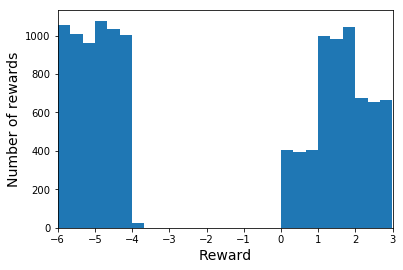


-----------------
Positive rewards:
-----------------
min = 0.01 
max = 3.0 
mean = 1.63296779388 
std = 0.759815674255 
skewness = -0.15368696066 
kurtosis = -0.744316427957

-----------------
Negative rewards:
-----------------
min = -6.0 
max = -4.0 
mean = -4.9986131861 
std = 0.580085340455 
skewness = -0.00716427444537 
kurtosis = -1.21411650428


In [2]:
# python2.7 smartcab/agent01.py |& tee run01.log
! cat run01_v2.log | grep rewarded | awk '{print $NF}' | sed s'\)\\g' > run01.rewards
! awk '{if ($1 > 0) i++; else j++}END{print "Rewards: positive",i,", negative", j}' run01.rewards 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
run01 = pd.read_csv("run01.rewards", header=None)
reward_min = run01.min()[0]
reward_max = run01.max()[0]
print("Minimal reward is", reward_min)
print("Maximal reward is", reward_max)
plt.hist(run01, bins=27)
#plt.hist(run01_negative)
plt.xlabel("Reward", size=14)
plt.xlim([-6, 3])
plt.ylabel("Number of rewards", size=14)
plt.show()
run01_positive = run01[run01 > 0]
run01_positive_min = run01_positive.min()[0]
run01_positive_max = run01_positive.max()[0]
run01_positive_mean = run01_positive.mean()[0]
run01_positive_std = run01_positive.std()[0]
run01_positive_skewness = run01_positive.skew()[0]
run01_positive_kurtosis = run01_positive.kurtosis()[0]
print("\n-----------------\nPositive rewards:\n-----------------\nmin =", run01_positive_min,
      "\nmax =", run01_positive_max,
      "\nmean =", run01_positive_mean,
      "\nstd =", run01_positive_std,
     "\nskewness =", run01_positive_skewness,
     "\nkurtosis =", run01_positive_kurtosis)
run01_negative = run01[run01 < 0]
run01_negative_min = run01_negative.min()[0]
run01_negative_max = run01_negative.max()[0]
run01_negative_mean = run01_negative.mean()[0]
run01_negative_std = run01_negative.std()[0]
run01_negative_skewness = run01_negative.skew()[0]
run01_negative_kurtosis = run01_negative.kurtosis()[0]
print("\n-----------------\nNegative rewards:\n-----------------\nmin =", run01_negative_min,
      "\nmax =", run01_negative_max,
      "\nmean =", run01_negative_mean,
      "\nstd =", run01_negative_std,
     "\nskewness =", run01_negative_skewness,
     "\nkurtosis =", run01_negative_kurtosis)

As we see, the structure of **negative reward** distribution is consistent with the **homogeneous random distribution between -6.0 and -4.0**. In contrast, **positive rewards** are distributed **non-homogeneously**: **between 0.0 and 1.0** and **between 2.0 and 3.0**, their number is **substantially suppressed** compared to the number of rewards between 1.0 and 2.0.

### Understand the Code
In addition to understanding the world, it is also necessary to understand the code itself that governs how the world, simulation, and so on operate. Attempting to create a driving agent would be difficult without having at least explored the *"hidden"* devices that make everything work. In the `/smartcab/` top-level directory, there are two folders: `/logs/` (which will be used later) and `/smartcab/`. Open the `/smartcab/` folder and explore each Python file included, then answer the following question.

### Question 2
- *In the *`agent.py`* Python file, choose three flags that can be set and explain how they change the simulation.*
- *In the *`environment.py`* Python file, what Environment class function is called when an agent performs an action?*
- *In the *`simulator.py`* Python file, what is the difference between the *`'render_text()'`* function and the *`'render()'`* function?*
- *In the *`planner.py`* Python file, will the *`'next_waypoint()`* function consider the North-South or East-West direction first?*

**Answer:** *In the *`agent.py`* Python file, choose three flags that can be set and explain how they change the simulation.*

To fully understand the code, I have decided to describe **all flags** (instead of three arbitrarily chosen) in agent.py. They are divided into different groups:

Create the environment:
- **verbose** (default is False) - controls output verbosity - setting it to True adds to initial output position, destination, deadline (at the beginning of each training trial), current location, heading, action, obtained reward and the detailed data (for each step in a trial); 
- **num_dummies** (default is 100) - number of dummy agents (cars) in the environment;
- **grid_size** (default is (8, 6))- discrete number of intersections (columns, rows) - note the minimal grid_size to run a simulation is (1, 8), (2, 6), (3, 6), (4, 4), (5, 4), (6, 2), (7, 2), (8, 1), (9, 1), (10, 1) etc.

Create the driving agent:
- **learning** (default is None) - set to True if want to use Q-learning; 
- **epsilon** (default is 1.0) - epsilon-greedy exploration parameter for Q-learning;
- **alpha** (default is 0.5) - Q-learning rate.

Follow the driving agent:
- **enforce_deadline** (default is None) - set to True if want to enforce a deadline metric (this gives a penalty on rewards when approaching deadline).

Create the simulation:
- **update_delay** (default is 2.0) - delay time (in seconds) at the end of each step;
- **display** (default is True) - setting it to False disables GUI;
- **log_metrics** (default is False) - if True writes trial and simulation logs to ./logs/. directory;
- **optimized** (default is False) - if True changes the default log file name.

Run the simulator:
- **tolerance** (default is 0.05) - minimal epsilon to start testing;
- **n_test** (default is 0) - number of testing trials.
****
*In the *`environment.py`* Python file, what Environment class function is called when an agent performs an action?*

In the `environment.py` Python file, the function `'act(self, agent, action)'` is called to **perform an action of an agent**.
****
*In the *`simulator.py`* Python file, what is the difference between the *`'render_text()'`* function and the *`'render()'`* function?*

In the `simulator.py` Python file, the `'render_text()'` function provides **GUI render display** of the simulation while the `'render()'` function provides **non-GUI render display**.
****
*In the *`planner.py`* Python file, will the *`'next_waypoint()'`* function consider the North-South or East-West direction first?*

In the `planner.py` Python file, the `'next_waypoint()'` function initially checks if a destination is at a location, then considers **East-West direction** and finally considers **North-South direction**.

## Implement a Basic Driving Agent

The first step to creating an optimized Q-Learning driving agent is getting the agent to actually take valid actions. In this case, a valid action is one of `None`, (do nothing) `'left'` (turn left), `right'` (turn right), or `'forward'` (go forward). For your first implementation, navigate to the `'choose_action()'` agent function and make the driving agent randomly choose one of these actions. Note that you have access to several class variables that will help you write this functionality, such as `'self.learning'` and `'self.valid_actions'`. Once implemented, run the agent file and simulation briefly to confirm that your driving agent is taking a random action each time step.

Because it is suggested that driving agent takes a random action during each time step (regardless of training/simulation), I have implemented it by adding **the following line of code** into the `'choose_action()'` function in `agent.py`:

`action = random.sample(self.valid_actions, 1)[0]`

The results of the simulation are written below.

### Basic Agent Simulation Results
To obtain results from the initial simulation, you will need to adjust following flags:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file in `/logs/`.
- `'n_test'` - Set this to `'10'` to perform 10 testing trials.

Optionally, you may disable to the visual simulation (which can make the trials go faster) by setting the `'display'` flag to `False`. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation!

Once you have successfully completed the initial simulation (there should have been 20 training trials and 10 testing trials), run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!
Run the agent.py file after setting the flags from projects/smartcab folder instead of projects/smartcab/smartcab.


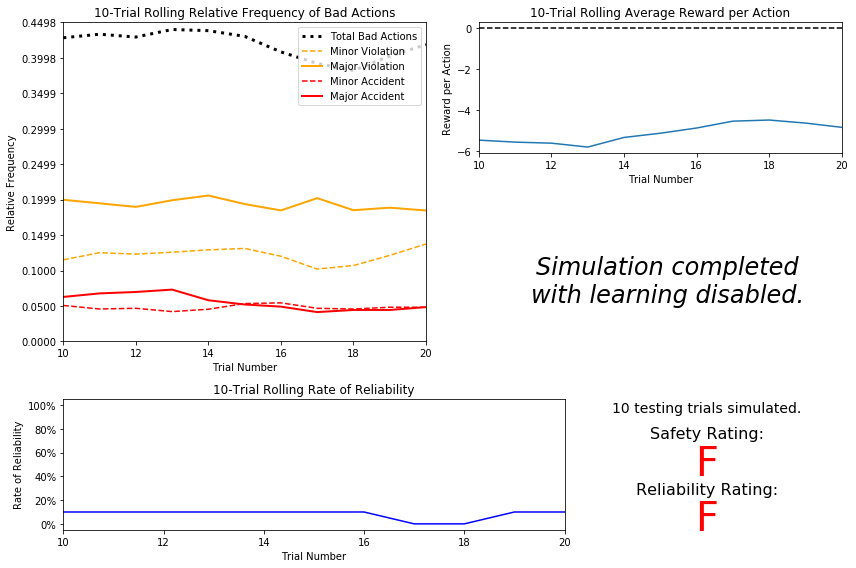

In [3]:
# Create 'sim_no-learning' log file:
# python2.7 smartcab/agent02_v2.py |& tee run02_v2.log 

# Load the 'sim_no-learning' log file from the initial simulation results
vs.plot_trials('sim_no-learning.csv')

### Question 3
Using the visualization above that was produced from your initial simulation, provide an analysis and make several observations about the driving agent. Be sure that you are making at least one observation about each panel present in the visualization. Some things you could consider:
- *How frequently is the driving agent making bad decisions? How many of those bad decisions cause accidents?*
- *Given that the agent is driving randomly, does the rate of reliability make sense?*
- *What kind of rewards is the agent receiving for its actions? Do the rewards suggest it has been penalized heavily?*
- *As the number of trials increases, does the outcome of results change significantly?*
- *Would this Smartcab be considered safe and/or reliable for its passengers? Why or why not?*

**Answer:** *How frequently is the driving agent making bad decisions? How many of those bad decisions cause accidents?*

Not surprisingly, **our randomly driving agent makes bad decisions quite often**: **about 35-45% of total actions are bad**. Moreover, **about 10% of total decisions cause driving accidents** (of course, the ratio between the number of driving accidents and the number of wrong actions should depend on the traffic parameters, such as `grid_size` and `num_dummies`. These numbers are obtained with the default values `grid_size = (8, 6)` and `num_dummies = 100`).
*****
*Given that the agent is driving randomly, does the rate of reliability make sense?*

As we see from this example, the reliability rate for a randomly driving agent is very low (below ~20%). Such a small reliability rate (for default `grid_size = (8, 6)`) is **by expectations from [random walks](http://mathworld.wolfram.com/RandomWalk2-Dimensional.html)**. Given that, it **should be comparable to 100%** only for very small `grid_size` (e.g., for (1, 1) it is precisely 100%) and should roughly decrease as 1/grid_size, so the estimated reliability rate for the `grid_size = (8, 6)` is about 1/7 $\approx$ 14%.
*****
*What kind of rewards is the agent receiving for its actions? Do the rewards suggest it has been penalized heavily?*

In total, there are **17 different types of rewards** received by the agent **during our simulation** (note that due to **the limited number of simulations**, `n_test = 10`, certain kinds of rewards **remain inexperienced** in this example):

In [4]:
# python2.7 smartcab/agent02_v2.py |& tee run02_v2.log
! cat run02_v2.log | grep rewarded | grep Agent | awk -F '(' '{print $1}' | sort -u

Agent attempted driving forward through a red light. 
Agent attempted driving forward through a red light with traffic and cause a major accident. 
Agent attempted driving left through a red light. 
Agent attempted driving left through a red light with traffic and cause a major accident. 
Agent attempted driving left through traffic and cause a minor accident. 
Agent attempted driving right through traffic and cause a minor accident. 
Agent drove forward instead of left. 
Agent drove forward instead of right. 
Agent drove left instead of forward. 
Agent drove left instead of right. 
Agent drove right instead of forward. 
Agent drove right instead of left. 
Agent followed the waypoint forward. 
Agent followed the waypoint left. 
Agent followed the waypoint right. 
Agent idled at a green light with no oncoming traffic. 
Agent properly idled at a red light. 


These rewards are classified by the following **5 reward statuses** (see for details `'render_text()'` function in `simulator.py`):
- **legal actions** (`status = 0`) - i.e. "Agent properly idled at a red light", "Agent idled at a green light with oncoming traffic", "Agent followed the waypoint {}", "Agent drove {} instead of {}". 
- **minor violations** (`status = 1`) - i.e. "Agent idled at a green light with no oncoming traffic".
- **major violations** (`status = 2`) - i.e. "Agent attempted driving {} through a red light".
- **minor accidents** (`status = 3`) - i.e. "Agent attempted driving {} through traffic and cause a minor accident".
- **major accidents** (`status = 4`) - i.e. "Agent attempted driving {} through a red light with traffic and cause a major accident".

The reward status number is positively correlated with the penalty score: **the higher the reward status** (the measure of the seriousness of an agent's wrong move), **the larger is the penalty** (= negative reward). For example, minor violations are penalized by -5, major violations by -10, minor accidents by -20 and major accidents by -40, as `'act()'` function of `environment.py` demonstrates (note that the accident status is not the only penalty factor. E.g., in case of `enforce_deadline = True` there is a penalty factor based on remaining time).
****
*As the number of trials increases, does the outcome of results change significantly?*

I would say no; though there is some stochasticity due to a small fraction of accidents, the total reward and the illegal move fractions seem to fluctuate around a certain value. Of course, this is just the consequence of the fact that we do not visualize first 10 testing sets which (especially several first ones) should exhibit larger fluctuations. 

****
*Would this Smartcab be considered safe and/or reliable for its passengers? Why or why not?*

I consider such Smartcap **neither safe nor reliable**. First, the obtained **accident rate of ~10%** of accidents means about an accident or more per week (if driving 2 times daily); it resembles the well-known [Russian roulette](https://en.wikipedia.org/wiki/Russian_roulette) game with the only exception that it is more dangerous for the rest of agents. Second, the obtained **reliability rate of ~20%** at such as small distance and decreasing even more with the further increase to distances means that this Smarcab is **practically unreliable**.

## Inform the Driving Agent
The second step to creating an optimized Q-learning driving agent is defining a set of states that the agent can occupy in the environment. Depending on the input, sensory data, and additional variables available to the driving agent, a set of states can be defined for the agent so that it can eventually *learn* what action it should take when occupying a state. The condition of `'if state then action'` for each state is called a **policy**, and is ultimately what the driving agent is expected to learn. Without defining states, the driving agent would never understand which action is most optimal -- or even what environmental variables and conditions it cares about!

### Identify States
Inspecting the `'build_state()'` agent function shows that the driving agent is given the following data from the environment:
- `'waypoint'`, which is the direction the *Smartcab* should drive leading to the destination, relative to the *Smartcab*'s heading.
- `'inputs'`, which is the sensor data from the *Smartcab*. It includes 
  - `'light'`, the color of the light.
  - `'left'`, the intended direction of travel for a vehicle to the *Smartcab*'s left. Returns `None` if no vehicle is present.
  - `'right'`, the intended direction of travel for a vehicle to the *Smartcab*'s right. Returns `None` if no vehicle is present.
  - `'oncoming'`, the intended direction of travel for a vehicle across the intersection from the *Smartcab*. Returns `None` if no vehicle is present.
- `'deadline'`, which is the number of actions remaining for the *Smartcab* to reach the destination before running out of time.

### Question 4
*Which features available to the agent are most relevant for learning both **safety** and **efficiency**? Why are these features appropriate for modeling the *Smartcab* in the environment? If you did not choose some features, why are those features* not *appropriate? Please note that whatever features you eventually choose for your agent's state, must be argued for here. That is: your code in agent.py should reflect the features chosen in this answer.
*

NOTE: You are not allowed to engineer new features for the smartcab. 

**Answer:** Consider the `'build_state()'` function. The `inputs['light']` variable is the most important for **safety** while the `'waypoint'` and `'deadline variable'` are the most important **efficiency/reliability** of the Smartcab move.

As an example of such relationship, look on `'update()'` function of the `'DummyAgent()'` class. This function describes the behavior of **dummy agents** assuring **their 100% safety according to the established motion rules** (so that **all accidents that happened with the Smartcab are the consequences of its risky moves**). For example, **it is not OK to turn out right at the red light and if the other car goes forward from the left**. But **it is still OK to turn out right at the green light if the other car goes forward from the left** (so it assumes that the other car also obeys the same rules and will stop and pass it by):
        
        # Check if the chosen waypoint is safe to move to.
        action_okay = True
        if self.next_waypoint == 'right':
            if inputs['light'] == 'red' and inputs['left'] == 'forward':
                action_okay = False
        elif self.next_waypoint == 'forward':
            if inputs['light'] == 'red':
                action_okay = False
        elif self.next_waypoint == 'left':
            if inputs['light'] == 'red' or (inputs['oncoming'] == 'forward' or inputs['oncoming'] == 'right'):
                action_okay = False

Note that dummy agents have **no fixed final destination** and therefore choose a direction of their subsequent move **randomly**:

    self.next_waypoint = random.choice(Environment.valid_actions[1:])

As we already learned, **such a policy will result in an unacceptably small reliability rating**, so we should design it for a Smartcab in a smarter way.

As we immediately see, the traffic rules are **independent of `inputs['right']`** which thus should be omitted to reduce the number of parameter space and to facilitate the learning. Also, the `'deadline'` seems to be not directly appropriate since it does not directly influence the score and has **the substantial number of states**.

Among the remaining features, `'deadline'` seems to be **the least appropriate** because it does not directly influence the score and has **very large number of states**, so I have decided not to use it for training as well.

Finally, we leave with `waypoint`, `inputs['light']`, `inputs['left']` and `inputs['oncoming']`. Ignoring planned route (`waypoint`) is not an option; otherwise the agent will move randomly and will never deliver on time. Ignoring traffic lights (`inputs['light']`) is also not an option; otherwise the agent will have unacceptably high rate of accidents. About `inputs['left']` and `inputs['oncoming']`, there are **four possibilities** that we consider below:

- **Possibility 1**: adding none of them (in addition to `waypoint` and `inputs['light']`);

- **Possibility 2**: adding `inputs['left']` only;

- **Possibility 3**: adding `inputs['oncoming']` only;

- **Possibility 4**: adding both `inputs['left']` and `inputs['oncoming']`.

### Define a State Space
When defining a set of states that the agent can occupy, it is necessary to consider the *size* of the state space. That is to say, if you expect the driving agent to learn a **policy** for each state, you would need to have an optimal action for *every* state the agent can occupy. If the number of all possible states is very large, it might be the case that the driving agent never learns what to do in some states, which can lead to uninformed decisions. For example, consider a case where the following features are used to define the state of the *Smartcab*:

`('is_raining', 'is_foggy', 'is_red_light', 'turn_left', 'no_traffic', 'previous_turn_left', 'time_of_day')`.

How frequently would the agent occupy a state like `(False, True, True, True, False, False, '3AM')`? Without a near-infinite amount of time for training, it's doubtful the agent would ever learn the proper action!

### Question 5
*If a state is defined using the features you've selected from **Question 4**, what would be the size of the state space? Given what you know about the environment and how it is simulated, do you think the driving agent could learn a policy for each possible state within a reasonable number of training trials?*  
**Hint:** Consider the *combinations* of features to calculate the total number of states!

**Answer:** The four features selected in **Question 4** are:
- '`waypoint`', 3 possible states ('`forward`', '`left`', '`right`');
- '`light`', 2 possible states ('`green`', '`red`');
- '`left`', 4 possible states ('`forward`', '`left`', '`right`', `None`);
- '`oncoming`', 4 possible states ('`forward`', '`left`', '`right`', `None`).

If we consider learning for **all four features** (this is the **possibility 4** described above), there are  $3 \times 2 \times 4 \times 4 = 96$ possible states. Combining them with 4 different actions for each possible state, so to observe all of them, we obtain **$4 \times 96 = 384$ outcomes of learning**. 

This number should be compared with the total number of learning steps during our simulations. This number can be estimated as follows. First, the typical [Manhattan distance](https://en.wikipedia.org/wiki/Taxicab_geometry) with the default '`grid_size = (8, 6)`' is $\approx 7$ (~'`grid_size`'). According to the game rules, this distance should be covered during 7-35 steps. Given the default value of 20 training trials and the average learning probability is 0.5 (or 1.0 linearly decreasing to 0.0 at the end of training trials), this corresponds to **70-350 training steps**. **This number of training steps is not enough to learn about all 384 possible outcomes**; this will lead to **significant "under-learning"** (so the Smarcab agent would **not** learn a policy for each possible state). Such under-learning can cause, first of all, a large probability of traffic accidents making the Smartcab **unsafe**. Therefore, we should consider **further reduction of the feature space**.

The most significant reduction is described by the **possibility 1**. If we consider only '`waypoint`' and '`light`' features (and thus will not care about the traffic situation on the left or oncoming directions), there are only 6 possible states and 24 possible outcomes. In this case, we are practically sure that the Smartcab will learn about every possible outcome during 20 training trials, and thus will not compromise safety.

Finally, for **possibilities 2 and 3**, we adding **one** new feature (either '`ongoing`' or '`left`') to the **possibility 1** (which parameter space is described by '`waypoint`' and '`light`' features). This corresponds to 24 possible states with 96 possible outcomes. According to the [80/20 rule](https://en.wikipedia.org/wiki/Pareto_principle)), the significant fraction of states for which the Smartcab will not learn a policy is expected which **may still compromise safety**.

As a result, if the number of training trials and the grid size is both fixed at default values, the only possibility to construct a safe car is the **possibility 1**. Because, as a consequence, we sacrificed the knowledge of some relevant parameters (such as information about the '`ongoing`' or '`left`' driving agents), this may, however, affect the **reliability** - as the Smartab teaches very simple behavior, its driving trajectory can be much far from optimal. Therefore, it is highly desirable to **provide more training** (by increasing either grid size or number of training simulations). With the **4-fold increase** in the training time, I expect to teach the Smartcab for **possibilities 2 or 3**, and with the **16-fold increase** in the training time - to teach for **possibility 4**. 

### Update the Driving Agent State
For your second implementation, navigate to the `'build_state()'` agent function. With the justification you've provided in **Question 4**, you will now set the `'state'` variable to a tuple of all the features necessary for Q-Learning. Confirm your driving agent is updating its state by running the agent file and simulation briefly and note whether the state is displaying. If the visual simulation is used, confirm that the updated state corresponds with what is seen in the simulation.

**Note:** Remember to reset simulation flags to their default setting when making this observation!

-----
## Implement a Q-Learning Driving Agent
The third step to creating an optimized Q-Learning agent is to begin implementing the functionality of Q-Learning itself. The concept of Q-Learning is fairly straightforward: For every state the agent visits, create an entry in the Q-table for all state-action pairs available. Then, when the agent encounters a state and performs an action, update the Q-value associated with that state-action pair based on the reward received and the iterative update rule implemented. Of course, additional benefits come from Q-Learning, such that we can have the agent choose the *best* action for each state based on the Q-values of each state-action pair possible. For this project, you will be implementing a *decaying,* $\epsilon$*-greedy* Q-learning algorithm with *no* discount factor. Follow the implementation instructions under each **TODO** in the agent functions.

Note that the agent attribute `self.Q` is a dictionary: This is how the Q-table will be formed. Each state will be a key of the `self.Q` dictionary, and each value will then be another dictionary that holds the *action* and *Q-value*. Here is an example:

```
{ 'state-1': { 
    'action-1' : Qvalue-1,
    'action-2' : Qvalue-2,
     ...
   },
  'state-2': {
    'action-1' : Qvalue-1,
     ...
   },
   ...
}
```

Furthermore, note that you are expected to use a *decaying* $\epsilon$ *(exploration) factor*. Hence, as the number of trials increases, $\epsilon$ should decrease towards 0. This is because the agent is expected to learn from its behavior and begin acting on its learned behavior. Additionally, The agent will be tested on what it has learned after $\epsilon$ has passed a certain threshold (the default threshold is 0.05). For the initial Q-Learning implementation, you will be implementing a linear decaying function for $\epsilon$.

### Q-Learning Simulation Results
To obtain results from the initial Q-Learning implementation, you will need to adjust the following flags and setup:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file and the Q-table as a `.txt` file in `/logs/`.
- `'n_test'` - Set this to `'10'` to perform 10 testing trials.
- `'learning'` - Set this to `'True'` to tell the driving agent to use your Q-Learning implementation.

In addition, use the following decay function for $\epsilon$:

$$ \epsilon_{t+1} = \epsilon_{t} - 0.05, \hspace{10px}\textrm{for trial number } t$$

If you have difficulty getting your implementation to work, try setting the `'verbose'` flag to `True` to help debug. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation! 

Once you have successfully completed the initial Q-Learning simulation, run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!

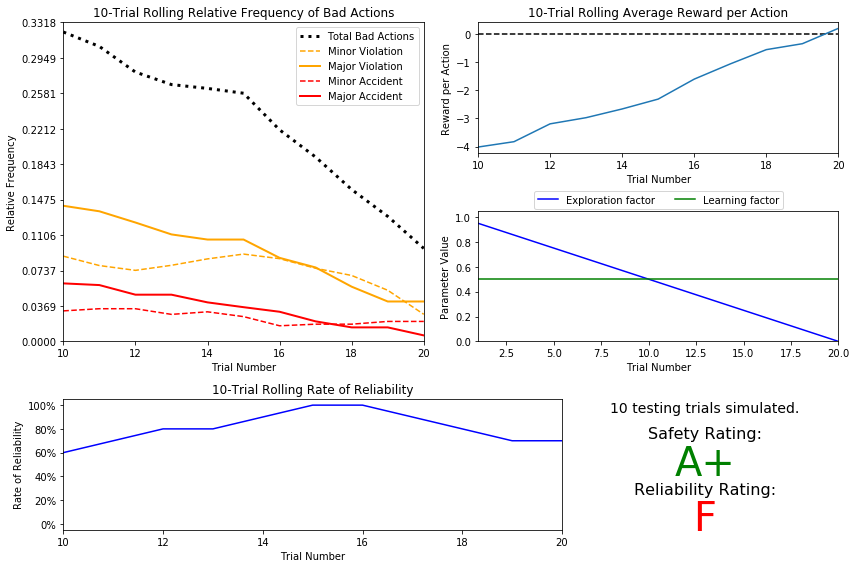

In [5]:
# Load the 'sim_default-learning' file from the default Q-Learning simulation
vs.plot_trials('sim_default-learning.csv')

### Question 6
Using the visualization above that was produced from your default Q-Learning simulation, provide an analysis and make observations about the driving agent like in **Question 3**. Note that the simulation should have also produced the Q-table in a text file which can help you make observations about the agent's learning. Some additional things you could consider:  
- *Are there any observations that are similar between the basic driving agent and the default Q-Learning agent?*
- *Approximately how many training trials did the driving agent require before testing? Does that number make sense given the epsilon-tolerance?*
- *Is the decaying function you implemented for $\epsilon$ (the exploration factor) accurately represented in the parameters panel?*
- *As the number of training trials increased, did the number of bad actions decrease? Did the average reward increase?*
- *How does the safety and reliability rating compare to the initial driving agent?*

**Answer:** As we see, the default Q-Learning agent has significantly improved the **rewards/action ratio** and the **reliability rate** compared to the basic driving agent. Although the driving agent attains the **highest safety rating** (A+), there is **an open window for substantial progress in reliability rating**.
****
- *Are there any observations that are similar between the basic driving agent and the default Q-Learning agent?*

**I do not think so**; by comparing the two above visualizations, we see the **drastic difference** between the basic driving agent and the default Q-Learning agent. The origin of this difference is the fact **learning** itself - whereas **the basic driving agent has not learned at all** (by construction) making instead stochastic moves, **the default Q-Learning agent has a programmed ability to improve its performance during the training process** (taking the strength of the reinforcement learning).
****
- *Approximately how many training trials did the driving agent require before testing? Does that number make sense given the epsilon-tolerance?*

The detailed analysis described above tells that with the default training parameters (i.e., the size of the simulation grid) we expect that 20 training trials (also given by default) should be enough to train a safe Smartcab. However, to reach this goal (of training a safe Smartcab within 20 trials), we **substantially reduced the possible feature state** (by selecting **only two** essential features: '`waypoint`' and '`light`'). In agreement with our expectations, this cutting-edge feature selection **compromises the Smarcab's reliability**. To improve the reliability, we expect that at least 4-fold increase in the training trials should be performed, and an extra feature (either '`left`' or '`ongoing`') should be added to the possible feature state. Finally, we expect that with the 16-fold increase in the training trials, both '`left`' and '`ongoing`' features can be added, so the corresponding Smartcab will be able to learn driving rules.

Also, it may be worth to consider adding **more dummy agents** during the simulation. Such an increase **would increase the probability of driving accidents** making Smartcab learn **faster** how to avoid them.
****
- *Is the decaying function you implemented for $\epsilon$ (the exploration factor) accurately represented in the parameters panel?*

Yes, from the parameters panel one can directly see that the exploration factor $\epsilon$ decreases monotonically from 1.0 to 0.0 during the training process. 
****
- *As the number of training trials increased, did the number of bad actions decrease? Did the average reward increase?*

As expected from a learning process, the number of bad actions does decrease during the training process, with some fluctuations along the general trend. The average reward increases, together with the reliability rate, also according to our expectations.
****
- *How does the safety and reliability rating compare to the initial driving agent?*

As expected, the safety rating sharply improves becoming the highest possible (A+) compared to the initial lowest (F). With the help of feature engineering, the obtained Q-Learning Smartcab agent **can be considered safe**. However, although the reliability rating also increases (note that it fluctuates between realizations, but in this particular realization it is F). Also, the reliability rate during the default Q-learning training process becomes **substantially** larger (~60%) than that for the initial driving agent (~15%).

-----
## Improve the Q-Learning Driving Agent
The third step to creating an optimized Q-Learning agent is to perform the optimization! Now that the Q-Learning algorithm is implemented and the driving agent is successfully learning, it's necessary to tune settings and adjust learning paramaters so the driving agent learns both **safety** and **efficiency**. Typically this step will require a lot of trial and error, as some settings will invariably make the learning worse. One thing to keep in mind is the act of learning itself and the time that this takes: In theory, we could allow the agent to learn for an incredibly long amount of time; however, another goal of Q-Learning is to *transition from experimenting with unlearned behavior to acting on learned behavior*. For example, always allowing the agent to perform a random action during training (if $\epsilon = 1$ and never decays) will certainly make it *learn*, but never let it *act*. When improving on your Q-Learning implementation, consider the implications it creates and whether it is logistically sensible to make a particular adjustment.

### Improved Q-Learning Simulation Results
To obtain results from the initial Q-Learning implementation, you will need to adjust the following flags and setup:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file and the Q-table as a `.txt` file in `/logs/`.
- `'learning'` - Set this to `'True'` to tell the driving agent to use your Q-Learning implementation.
- `'optimized'` - Set this to `'True'` to tell the driving agent you are performing an optimized version of the Q-Learning implementation.

Additional flags that can be adjusted as part of optimizing the Q-Learning agent:
- `'n_test'` - Set this to some positive number (previously 10) to perform that many testing trials.
- `'alpha'` - Set this to a real number between 0 - 1 to adjust the learning rate of the Q-Learning algorithm.
- `'epsilon'` - Set this to a real number between 0 - 1 to adjust the starting exploration factor of the Q-Learning algorithm.
- `'tolerance'` - set this to some small value larger than 0 (default was 0.05) to set the epsilon threshold for testing.

Furthermore, use a decaying function of your choice for $\epsilon$ (the exploration factor). Note that whichever function you use, it **must decay to **`'tolerance'`** at a reasonable rate**. The Q-Learning agent will not begin testing until this occurs. Some example decaying functions (for $t$, the number of trials):

$$ \epsilon = a^t, \textrm{for } 0 < a < 1 \hspace{50px}\epsilon = \frac{1}{t^2}\hspace{50px}\epsilon = e^{-at}, \textrm{for } 0 < a < 1 \hspace{50px} \epsilon = \cos(at), \textrm{for } 0 < a < 1$$
You may also use a decaying function for $\alpha$ (the learning rate) if you so choose, however this is typically less common. If you do so, be sure that it adheres to the inequality $0 \leq \alpha \leq 1$.

If you have difficulty getting your implementation to work, try setting the `'verbose'` flag to `True` to help debug. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation! 

Once you have successfully completed the improved Q-Learning simulation, run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!

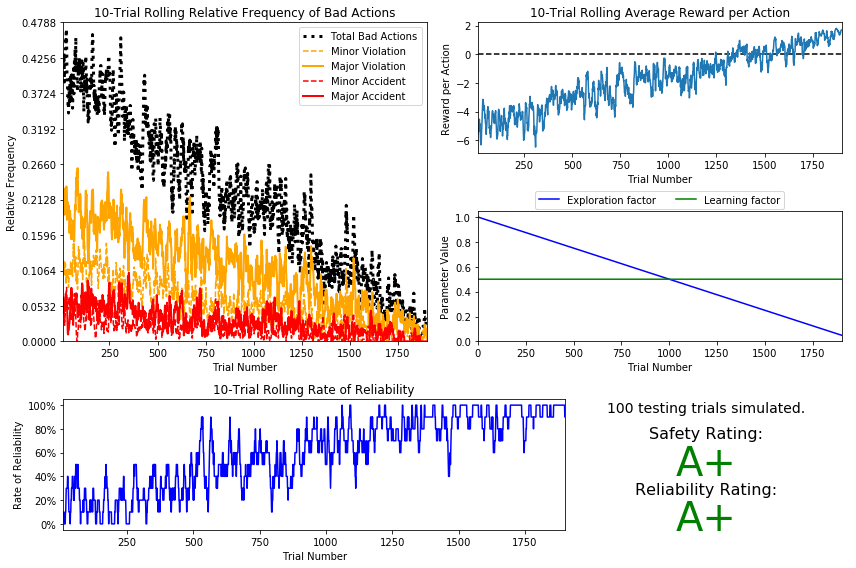

In [6]:
# Load the 'sim_improved-learning' file from the improved Q-Learning simulation
vs.plot_trials('sim_improved-learning.csv')

### Question 7
Using the visualization above that was produced from your improved Q-Learning simulation, provide a final analysis and make observations about the improved driving agent like in **Question 6**. Questions you should answer:  
- *What decaying function was used for epsilon (the exploration factor)?*
- *Approximately how many training trials were needed for your agent before begining testing?*
- *What epsilon-tolerance and alpha (learning rate) did you use? Why did you use them?*
- *How much improvement was made with this Q-Learner when compared to the default Q-Learner from the previous section?*
- *Would you say that the Q-Learner results show that your driving agent successfully learned an appropriate policy?*
- *Are you satisfied with the safety and reliability ratings of the *Smartcab*?*

**Answer:** As we learned before, the straightforward way to improve the ratings is **to increase the number of training trials**. It can simply be done by reducing the rate of decreasing $\epsilon$ after each training trial. By default, this rate is equal to 0.05. Because we started with $\epsilon = 1.0$ (changing initial $\epsilon$ does not make sense because **there is no need for the exploitation of the completely untrained model**), decreasing this rate to 0.01 (0.002, 0.0005) produces us 100 (500, 2000) training samples. Also, we increased the number of testing sets to 100 to reduce possible variations in final ratings. Below, we consider these cases in more details.

The results are summarized in the Table below:

|     File     | n_train | n_test |                              State space                             | No. possible outcomes | 5 safety ratings (in a row)  | 5 reliability ratings (in a row) |
|:------------:|:-------:|:------:|:--------------------------------------------------------------------:|:---------------------:|:----------------------------:|:--------------------------------:|
| `agent04_v2.py` |   100   |   100  |                     `waypoint`, `inputs['light']`                    |           24          |     (A+, A+, A+, A+, D)     |          (F, C, D, D, D)         |
| `agent05_v2.py` |   100   |   100  |          `waypoint`, `inputs['light']`, `inputs['oncoming']`          |          96          |      (D, D, A+, D, A+)      |          (A, A, A, A, A+)         |
| `agent06_v2.py` |   100   |   100  |            `waypoint`, `inputs['light']`, `inputs['left']`           |          96          |      (A+, A+, A+, A+, A+)     |          (C, B, F, F, C)         |
| `agent07_v2.py` |   500   |   100  |                     `waypoint`, `inputs['light']`                    |           24          |     (A+, A+, A+, A+, A+)     |          (D, D, C, C, C)         |
| `agent08_v2.py` |   500   |   100  |          `waypoint`, `inputs['light']`, `inputs['oncoming']`          |          96          |      (D, D, A+, D, A+)     |          (A, A, A, A, A)         |
| `agent09_v2.py` |   500   |   100  |            `waypoint`, `inputs['light']`, `inputs['left']`           |          96          |     (A+, A+, A+, A+, A+)     |          (B, C, C, D, C)         |
| `agent10_v2.py` |   2000   |   100  | `waypoint`, `inputs['light']`, `inputs['oncoming']`, `inputs['left']` |          384         |     (A+, A+, A+, A+, A+)     |          (A, A, A, A, A+)         |

As a result, I conclude that **the model implemented in `agent10_v2.py` is our best choice**: it produces **the best safety rating (5 A+ in a row)** and has **acceptable reliability rating (A, A, A, A, A+ in a row)**. A runner-up is a model implemented in `agent09_v2.py`: it produces **slightly worse reliability (B, C, C, D, C in a row)**.
****
- *What decaying function was used for epsilon (the exploration factor)?*

I have used the **linearly decreasing exploration factor**, similar to the previous example. Also, I always started with $\epsilon = 1$ at the beginning of the training (because there is no need to exploit the entirely untrained algorithm). However, I have decreased the $\epsilon$ decay rate from 0.05 to 0.01, 0.002 and 0.0005. Consequently, this leads to the increase of the number of training trials from 20 to 100, 500 and 2000 which is important to explore the action set in more details. Otherwise, the Smartcab would remain undertrained and, as a result, it will not learn how to avoid accidents.
****
- *Approximately how many training trials were needed for your agent before begining testing?*

It appears that 20 training trials are not enough; our best model uses 2000 training trials and the runner-up uses 500 training trials. The reason is the need to train the model adequately: ideally, all state space parameters should be filled by non-zero values. For example, in our best model (`agent10_v2.py`), only 2 of 384 values in `sim_improved-learning.txt` are filled with zeroes that leads to good safety and reliability ratings.
****
- *What epsilon-tolerance and alpha (learning rate) did you use? Why did you use them?*

I used default values of epsilon-tolerance (0.05) and alpha (0.5). The reason not to increase epsilon-tolerance is the exploration-exploitation tradeoff in Q-learning: during training, it is important both to explore all possible outcomes results and to exploit them further. About the alpha value: I have tried different values of alpha from 0.1 to 1.0 (with `agent04_v2.py`) and found that alpha=0.4-0.5 (close to its default value) are the most optimal for this problem because both smaller and larger values of alpha produce worse reliability ratings.
****
- *How much improvement was made with this Q-Learner when compared to the default Q-Learner from the previous section?*

There is no formal improvement in safety rating (because both Q-Learners have the highest A+ score), but there is the substantial improvement in reliability rating (from F to A).
****
- *Would you say that the Q-Learner results show that your driving agent successfully learned an appropriate policy?*

Yes, because there are no traffic violations in our best model (leading to the highest A+ testing score).
****
- *Are you satisfied with the safety and reliability ratings of the *Smartcab*?*

Yes, I am satisfied in both the safety (A+) and reliability (A) ratings of the improved Smartcab Q-Learner. 

### Define an Optimal Policy

Sometimes, the answer to the important question *"what am I trying to get my agent to learn?"* only has a theoretical answer and cannot be concretely described. Here, however, you can concretely define what it is the agent is trying to learn, and that is the U.S. right-of-way traffic laws. Since these laws are known information, you can further define, for each state the *Smartcab* is occupying, the optimal action for the driving agent based on these laws. In that case, we call the set of optimal state-action pairs an **optimal policy**. Hence, unlike some theoretical answers, it is clear whether the agent is acting "incorrectly" not only by the reward (penalty) it receives, but also by pure observation. If the agent drives through a red light, we both see it receive a negative reward but also know that it is not the correct behavior. This can be used to your advantage for verifying whether the **policy** your driving agent has learned is the correct one, or if it is a **suboptimal policy**.

### Question 8

1. Please summarize what the optimal policy is for the smartcab in the given environment. What would be the best set of instructions possible given what we know about the environment? 
   _You can explain with words or a table, but you should thoroughly discuss the optimal policy._

2. Next, investigate the `'sim_improved-learning.txt'` text file to see the results of your improved Q-Learning algorithm. _For each state that has been recorded from the simulation, is the **policy** (the action with the highest value) correct for the given state? Are there any states where the policy is different than what would be expected from an optimal policy?_ 

3. Provide a few examples from your recorded Q-table which demonstrate that your smartcab learned the optimal policy. Explain why these entries demonstrate the optimal policy.

4. Try to find at least one entry where the smartcab did _not_ learn the optimal policy.  Discuss why your cab may have not learned the correct policy for the given state.

Be sure to document your `state` dictionary below, it should be easy for the reader to understand what each state represents.

**Answer:** Not surprisingly, the expected optimal policy coincides with the U.S. right-of-way traffic laws. As I mentioned before, these laws have been already implemented as a part of `'update()'` function of the `'DummyAgent()'` class:
        
        # Check if the chosen waypoint is safe to move to.
        action_okay = True
        if self.next_waypoint == 'right':
            if inputs['light'] == 'red' and inputs['left'] == 'forward':
                action_okay = False
        elif self.next_waypoint == 'forward':
            if inputs['light'] == 'red':
                action_okay = False
        elif self.next_waypoint == 'left':
            if inputs['light'] == 'red' or (inputs['oncoming'] == 'forward' or inputs['oncoming'] == 'right'):
                action_okay = False

In other words, there are **exactly 6 rules** when the Smartab agent should obey:

- **Rule 1**: no turn right if there is a red light and an agent oncoming from left;
- **Rule 2**: no move forward if there is a red light;
- **Rule 3**: no turn left if there is a red light; 
- **Rule 4**: no turn left if there is an agent in the oncoming lane that wants to proceed either straight or to the right;
- **Rule 5**: no turn left if there is an agent  in the oncoming lane that wants to proceed either straight or to the right;
- **Rule 6**: in all other situations, perform the action scheduled in `waypoint`.         

To investigate the policy in `'sim_improved-learning.txt'`, we first convert it into a suitable dataframe:

In [7]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
# Preliminary analysis
! head logs/sim_improved-learning.txt
! cat logs/sim_improved-learning.txt | sed s'/(/\ /g' | sed s'/)//g' | sed s'/\,//g' | sed 's/'\''//g' > logs/sim_improved-learning.dat
#! cat logs/sim_improved-learning.txt | sed s'/[()]/\ /g' | sed s'/\,//g' > logs/sim_improved-learning.dat
data = pd.read_csv("logs/sim_improved-learning.dat", sep = " ", header=1)
data.columns = ['None', 'waypoint', 'light', 'oncoming', 'left']
data.drop(['None'], axis=1, inplace=True)
data.drop(data.index[0], axis=0, inplace=True)
#print(data.info())
#print(data.shape[0])
data_policy = pd.DataFrame(columns = ['waypoint', 'light', 'oncoming', 'left', 'action'])
#data_policy.
for i in range(int(data.shape[0]/5)):
    #print(">>>", i)
    index_min = 5*i+1
    index_max = 5*i+5
    data_sub = data.loc[index_min:index_max]
    waypoint = data_sub['waypoint'].iloc[0]
    light = data_sub['light'].iloc[0]
    oncoming = data_sub['oncoming'].iloc[0]
    left = data_sub['left'].iloc[0]
    data_sub.drop(data_sub.index[0], axis=0, inplace=True)
    data_sub.drop(['waypoint', 'oncoming'], axis=1, inplace=True)
    data_sub['left'] = data_sub['left'].astype(float)
    action = data_sub[data_sub['left'] == data_sub['left'].max()]['light'].tolist()[0]
    data_policy.loc[i, 'waypoint'] = waypoint
    data_policy.loc[i, 'light'] = light
    data_policy.loc[i, 'oncoming'] = oncoming
    data_policy.loc[i, 'left'] = left
    data_policy.loc[i, 'action'] = str(action)
data_policy.sort_values(data_policy.columns.tolist(), axis=0, inplace=True)
data_policy.head()

/-----------------------------------------
| State-action rewards from Q-Learning
\-----------------------------------------

('left', 'green', 'forward', 'left')
 -- forward : 0.37
 -- right : 0.75
 -- None : -4.39
 -- left : -20.30



,waypoint,light,oncoming,left,action
43,forward,green,None,None,forward
16,forward,green,None,forward,forward
53,forward,green,None,left,forward
95,forward,green,None,right,forward
28,forward,green,forward,None,forward


So, for example, if the state is (waypoint = 'left', light = 'green', oncoming = 'forward' and left = 'left'),
the optimal action is to **go right** and the suboptimal policy is to **go forward**. Indeed, turning left will cause a minor accident while failing to move will cause a minor traffic violation.

Now, consider the actions which **differ** from the waypoint prescription:

In [8]:
data_policy_exceptions = data_policy[data_policy['waypoint'] != data_policy['action']]
print(data_policy_exceptions.info())
data_policy_exceptions

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45 entries, 79 to 13
Data columns (total 5 columns):
waypoint    45 non-null object
light       45 non-null object
oncoming    45 non-null object
left        45 non-null object
action      45 non-null object
dtypes: object(5)
memory usage: 2.1+ KB
None


,waypoint,light,oncoming,left,action
79,forward,red,None,None,None
1,forward,red,None,forward,None
65,forward,red,None,left,None
11,forward,red,None,right,None
67,forward,red,forward,None,None
34,forward,red,forward,forward,None
37,forward,red,forward,left,None
52,forward,red,forward,right,None
83,forward,red,left,None,None
59,forward,red,left,forward,None


As we see, there are 45 of them. The next step is to **classify** these exceptions. First, as we see, if the light in **red**, the usual prescription is to stop and there is no exceptions:

In [9]:
data_policy_exceptions[(data_policy_exceptions['light'] == 'red') & (data_policy_exceptions['action'] != 'None')]

,waypoint,light,oncoming,left,action


Next, look for exceptions when the light is **green**:

In [10]:
data_policy_exceptions[data_policy_exceptions['light'] == 'green']

,waypoint,light,oncoming,left,action
25,left,green,forward,None,forward
88,left,green,forward,forward,right
0,left,green,forward,left,right
78,left,green,forward,right,right
45,left,green,right,None,right
58,left,green,right,forward,right
29,left,green,right,left,right
7,left,green,right,right,forward


They also look OK, as **it is prohibited to do the left turn when oncoming car is going forward or right**.

Interestingly, removing backpropagation from Q-Learning results in substantial decrease of weird actions!

-----
### Optional: Future Rewards - Discount Factor, `'gamma'`
Curiously, as part of the Q-Learning algorithm, you were asked to **not** use the discount factor, `'gamma'` in the implementation. Including future rewards in the algorithm is used to aid in propagating positive rewards backwards from a future state to the current state. Essentially, if the driving agent is given the option to make several actions to arrive at different states, including future rewards will bias the agent towards states that could provide even more rewards. An example of this would be the driving agent moving towards a goal: With all actions and rewards equal, moving towards the goal would theoretically yield better rewards if there is an additional reward for reaching the goal. However, even though in this project, the driving agent is trying to reach a destination in the allotted time, including future rewards will not benefit the agent. In fact, if the agent were given many trials to learn, it could negatively affect Q-values!

### Optional Question 9
*There are two characteristics about the project that invalidate the use of future rewards in the Q-Learning algorithm. One characteristic has to do with the *Smartcab* itself, and the other has to do with the environment. Can you figure out what they are and why future rewards won't work for this project?*

**Answer:** A motivation to use zero discount factor $\gamma$ is in "geometry" of the world. Because the Smartcab sees only the presence of adjacent neighbours without personalizing them, there is no need to make a distinction between different cars that are in the same position (measured by `inputs`) with respect to the Smartcab.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.